## EDA(Exploratory Data Analysis) for the project

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('./data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Histogram for cholestorl

Text(246.26402640264027, -1, '246')

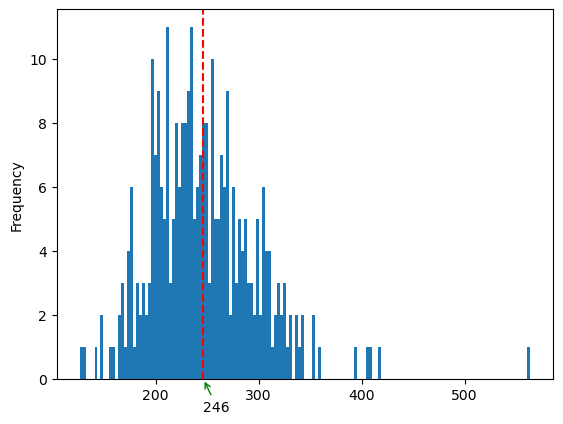

In [18]:
df.chol.plot(kind='hist', bins = int(len(df)/2))
plt.axvline(df.chol.mean(), linestyle = '--', color = 'red')
plt.annotate(
    int(df.chol.mean()),
    xy=(df.chol.mean(), 0),            # x=50 on x-axis
    xytext=(df.chol.mean(), -1),
    arrowprops=dict(arrowstyle="->", color="green")
)

### Ploting the number of heart disease cases by age

<Axes: xlabel='age'>

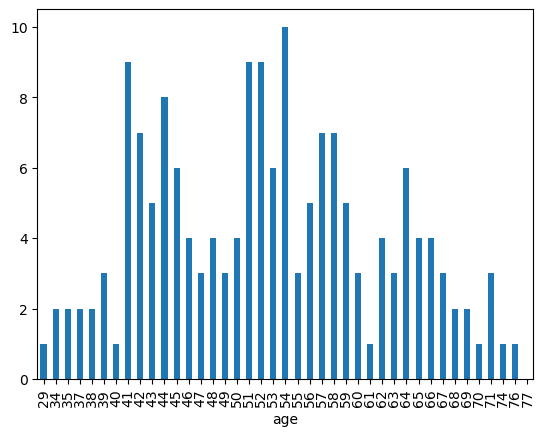

In [6]:
df.groupby('age').sum('target').target.plot(kind = 'bar')

### Plotting thalach vs age

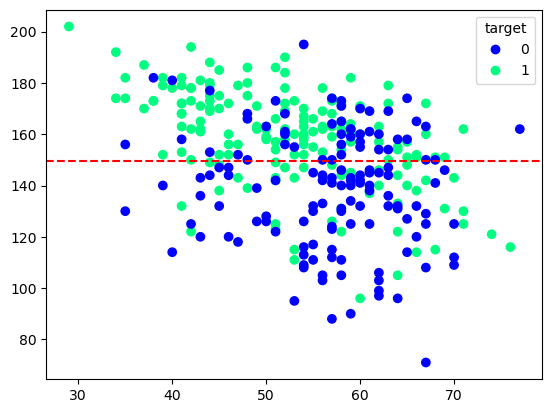

In [7]:
fig, ax = plt.subplots()

str_plt = ax.scatter(x = df.age, y = df.thalach, c = df.target, cmap = 'winter')

ax.legend(*str_plt.legend_elements(), title = 'target')
ax.axhline(df.thalach.mean(), linestyle = '--', color = 'red')

### Plotting cholestrol vs age

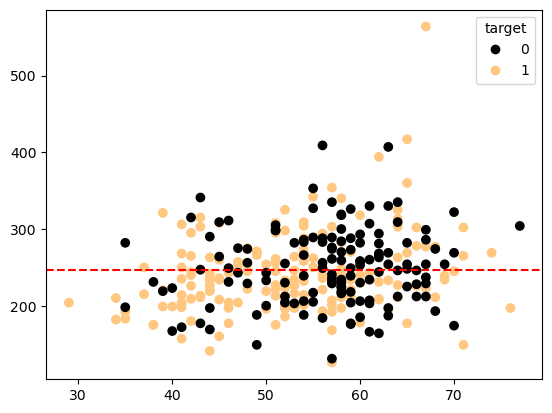

In [8]:
fig, ax = plt.subplots()

figure = ax.scatter(x = df.age, y = df.chol, c = df.target, cmap= 'copper')

ax.legend(*figure.legend_elements(), title = 'target')
ax.axhline(df.chol.mean(), linestyle = '--', color = 'red')

### Checking who has more positives recorded male or female

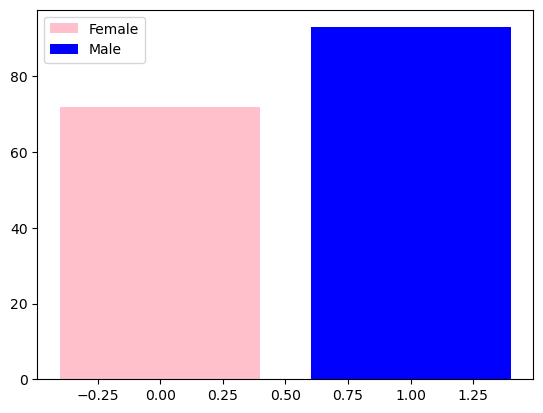

In [9]:
y = np.array(df.groupby('sex').sum('target').target)
x = np.array(df.sex.unique())[::-1]

fig, ax = plt.subplots()

figure = ax.bar(x = x, height=  y, color = ['pink', 'blue'])
figure[0].set_label("Female")
figure[1].set_label("Male")
ax.legend()


### Looking at cholestrol vs age with chest pain and cholestrol vs age with target

[Text(0.5, 1.0, 'Cholestorl and age with target'), Text(0.5, 0, 'age')]

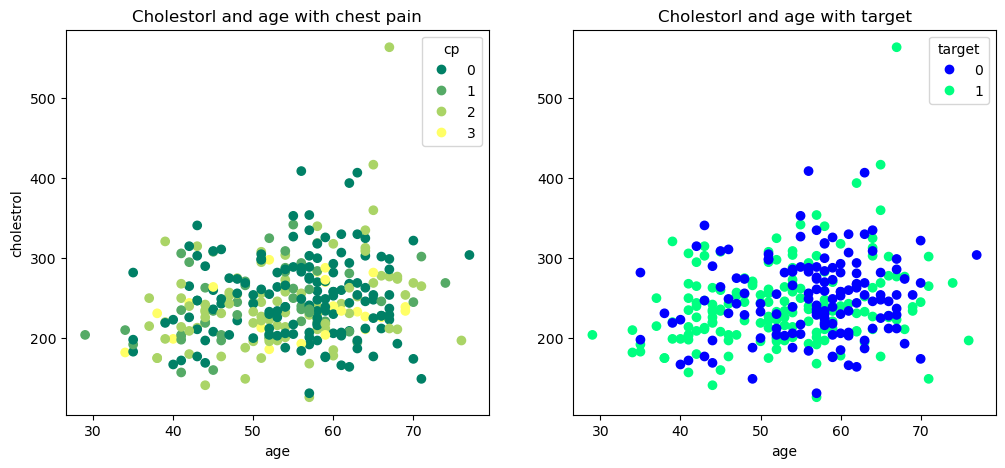

In [38]:
fig, ((ax1, ax2)) = plt.subplots(ncols=2, nrows=1, figsize = [12,5])

figure1 = ax1.scatter(x = df.age, y = df.chol, c = df.cp, cmap = 'summer')
figure2 = ax2.scatter(x = df.age, y = df.chol, c = df.target, cmap = 'winter')

ax1.legend(*figure1.legend_elements(), title  ='cp')
ax2.legend(*figure2.legend_elements(), title = 'target')

ax1.set(title='Cholestorl and age with chest pain', xlabel='age', ylabel='cholestrol')
ax2.set(title='Cholestorl and age with target', xlabel='age')



## Correlations

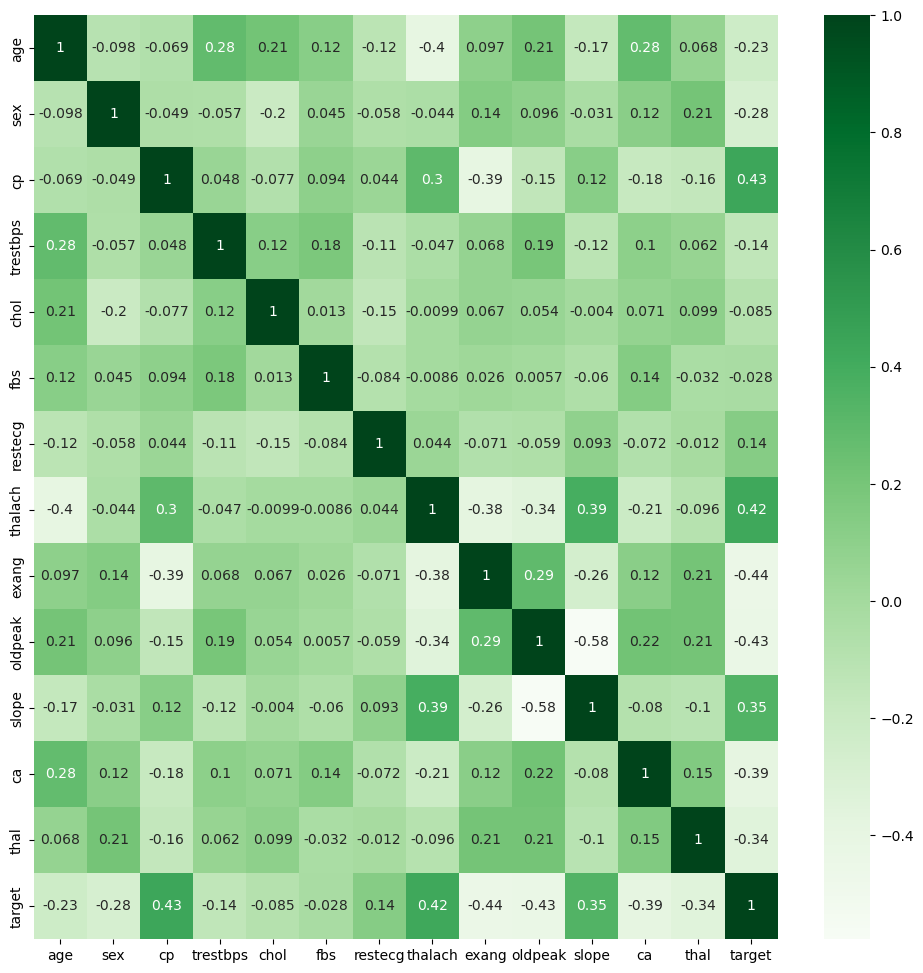

In [37]:
fig, ax = plt.subplots(figsize = (12,12))

correlations = df.corr()
ax = sns.heatmap(data=correlations, cmap = 'Greens', annot = True)